In [1]:
#importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
#loading trainnig csv file and testing csv file
train=pd.read_csv('C:/Users/Utkarsh yadav/OneDrive/Desktop/3rd Sem\IC272( Data Science III)/Project/archive/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('C:/Users/Utkarsh yadav/OneDrive/Desktop/3rd Sem/IC272( Data Science III)/Project/archive/sign_mnist_test/sign_mnist_test.csv')

In [3]:
labels=train['label'].values
#getting all the label values from trainig csv file

In [4]:
unique_val=np.array(labels)
#making array of labels

In [5]:
np.unique(unique_val)
#makinng a array of unique labels given in the dataset

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

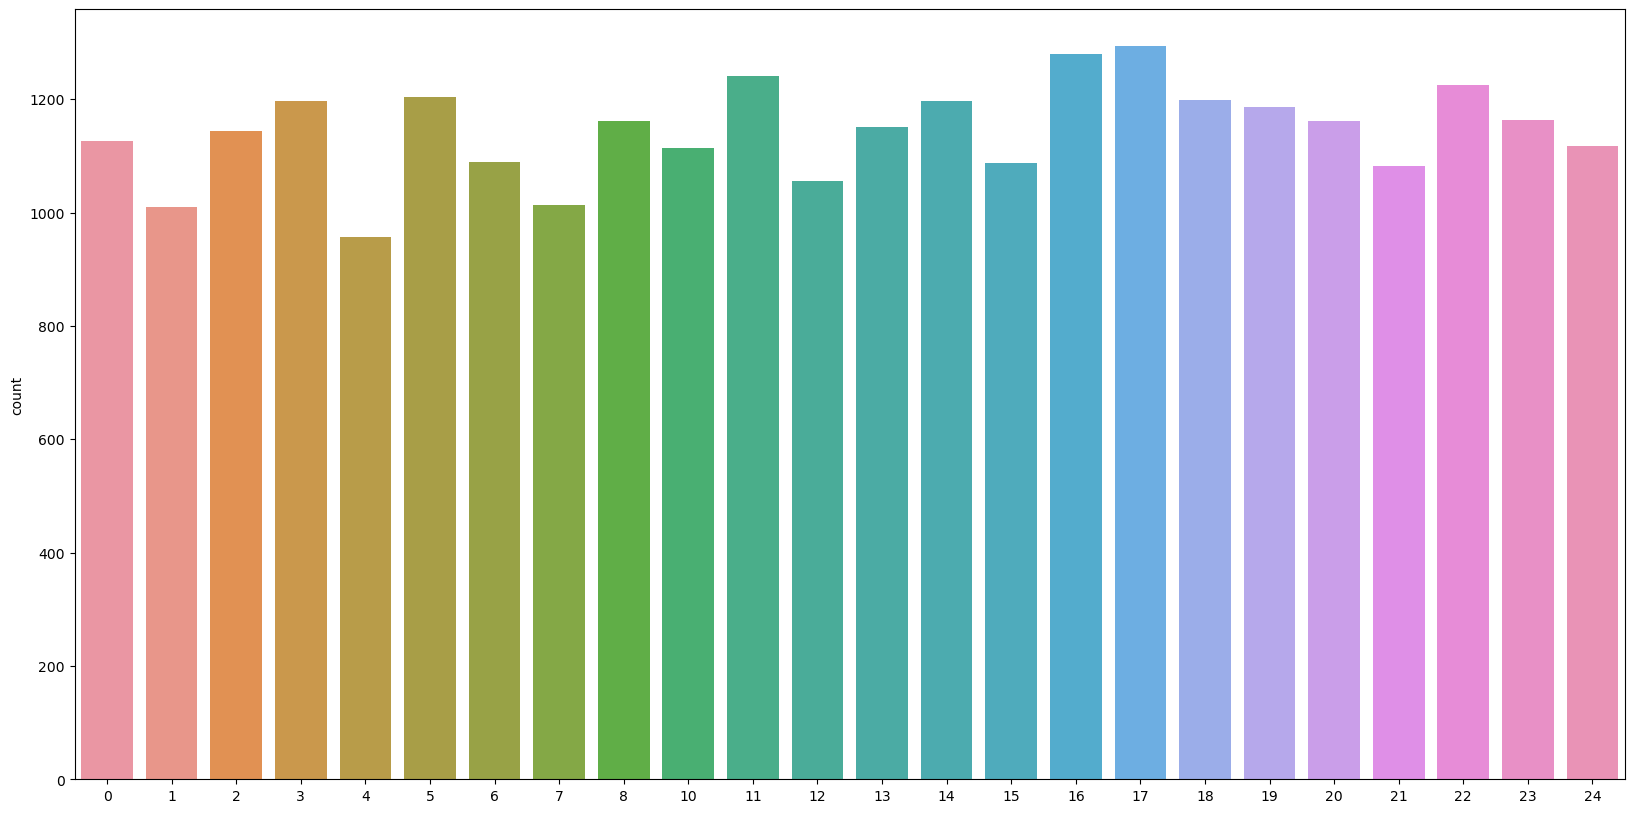

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x=labels)
#plotting a bar graph which shows data points belong to a particular label/class

In [7]:
train.drop('label',axis=1,inplace=True)
#droping label values from our trainig data

In [23]:
images=train.values
print(images)
images=np.array([np.reshape(i,(28,28)) for i in images])
#concerting trainig values in to a matrix of 28x28
images=np.array([i.flatten() for i in images])
#here we flatten image means keep it in 2 dimension


[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)
#here we are converting label in to binary formate which is a array
#all data and its coressponding class is reprented by hot enconding

In [10]:
print(np.shape(labels))
#shape of trainnig data with respective class

(27455, 24)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


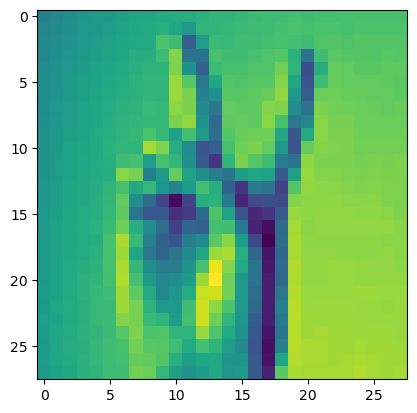

In [11]:
index=21

print(labels[index])
plt.imshow(images[index].reshape(28,28))
#shape of trainnig data with hot enconding

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size = 0.3,random_state = 100) 
#spliting trainnig  and testing data

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
batch_size=128
#batch contain 128 images
num_classes=24
epochs=25
#learning mechanism of machine it will increase efficiency on increasing but after a certain value of epoch it will decrease

In [14]:
x_train=x_train/255
x_test=x_test/255
#normalization

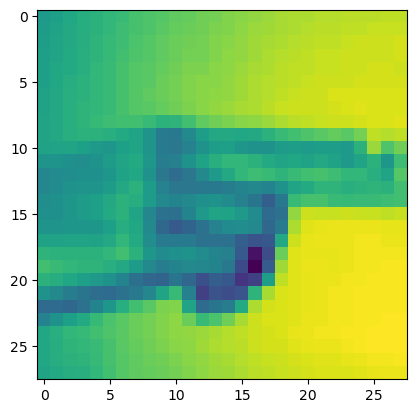

In [15]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(64,kernel_size= (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))




In [17]:

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [18]:

history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/25
151/151 [==============================] - 15s 93ms/step - loss: 2.7828 - accuracy: 0.1497 - val_loss: 2.0028 - val_accuracy: 0.3767
Epoch 2/25
151/151 [==============================] - 17s 115ms/step - loss: 1.5936 - accuracy: 0.4740 - val_loss: 1.0863 - val_accuracy: 0.6360
Epoch 3/25
151/151 [==============================] - 14s 95ms/step - loss: 0.9074 - accuracy: 0.6926 - val_loss: 0.5898 - val_accuracy: 0.8124
Epoch 4/25
151/151 [==============================] - 15s 99ms/step - loss: 0.5898 - accuracy: 0.8005 - val_loss: 0.4033 - val_accuracy: 0.8777
Epoch 5/25
151/151 [==============================] - 15s 97ms/step - loss: 0.4201 - accuracy: 0.8589 - val_loss: 0.2415 - val_accuracy: 0.9404
Epoch 6/25
151/151 [==============================] - 14s 91ms/step - loss: 0.2827 - accuracy: 0.9083 - val_loss: 0.1531 - val_accuracy: 0.9590
Epoch 7/25
151/151 [==============================] - 14s 94ms/step - loss: 0.1954 - accuracy: 0.9392 - val_loss: 0.0976 - val_accuracy

In [19]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print('Model Saved')

Model Saved


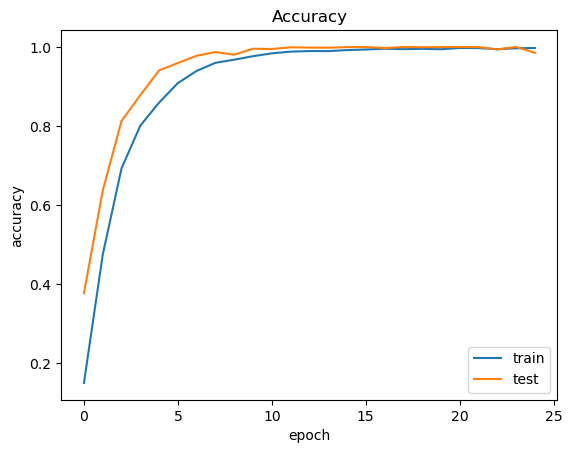

In [20]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
  
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','test'])
    plt.show()

In [21]:
test_labels=test['label']
test.drop('label',axis=1,inplace=True)
test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])
test_labels=label_binrizer.fit_transform(test_labels)
test_images=test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape
y_pred=model.predict(test_images)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8372838817624094